# 0.0 Data Prep

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import time
import math

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# import torch
# import torch.nn as nn
# import torch.utils.data as data


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go

## Load the Data

In [19]:
df = pd.read_csv("coursework_fintech.csv")
print(df.shape)
df.head()

(11782, 18)


,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,SubwayStation,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141592.0,2006.0,2007.0,8.0,814.0,3.0,management_in_trust,111.0,184.0,3.0,0.0,Kyungbuk_uni_hospital,2.0,1.0,1.0,1.0,1.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51327.0,1985.0,2007.0,8.0,587.0,8.0,self_management,80.0,76.0,2.0,2.0,Daegu,5.0,1.0,2.0,1.0,2.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Removing blank rows from the df
df = df.dropna()

# Removing string features from the df
df = df.drop("AptManageType", axis=1)
df = df.drop("SubwayStation", axis=1)

# Sorting the df by the year of sale
df = df.sort_values("YrSold", ascending=True)

df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park)
1,141592.0,2006.0,2007.0,8.0,814.0,3.0,111.0,184.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0
171,36283.0,1992.0,2007.0,11.0,355.0,4.0,200.0,0.0,5.0,10.0,7.0,1.0,1.0,1.0,5.0,1.0
169,194690.0,1993.0,2007.0,11.0,2337.0,18.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0
167,172566.0,1993.0,2007.0,11.0,1761.0,4.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0
165,86725.0,1993.0,2007.0,11.0,644.0,15.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0


In [21]:
# Defining the target
target = df["SalePrice"]

# Defining the features
features = df.drop("SalePrice", axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [22]:
target.head()

1      141592.0
171     36283.0
169    194690.0
167    172566.0
165     86725.0
Name: SalePrice, dtype: float64

In [23]:
features.head()

,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park)
1,2006.0,2007.0,8.0,814.0,3.0,111.0,184.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0
171,1992.0,2007.0,11.0,355.0,4.0,200.0,0.0,5.0,10.0,7.0,1.0,1.0,1.0,5.0,1.0
169,1993.0,2007.0,11.0,2337.0,18.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0
167,1993.0,2007.0,11.0,1761.0,4.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0
165,1993.0,2007.0,11.0,644.0,15.0,523.0,536.0,8.0,20.0,6.0,2.0,0.0,1.0,5.0,0.0


# 1.0 Dummy Regressor

In [26]:
from sklearn.dummy import DummyRegressor

# Create a dummy regressor object
dummy_regressor = DummyRegressor(strategy="mean")

# Fit the dummy regressor to the training data
dummy_regressor.fit(x_train, y_train)

# Make predictions on the test data
dummy_y_pred = dummy_regressor.predict(x_test)

# Evaluate the model using mean squared error and root mean squared error
dummy_mse = mean_squared_error(y_test, dummy_y_pred)
dummy_rmse = np.sqrt(dummy_mse)

print("Root Mean Squared Error: {:.2f}".format(dummy_rmse))
print("Mean squared error: ", dummy_mse)


Root Mean Squared Error: 106339.98
Mean squared error:  11308191453.783167


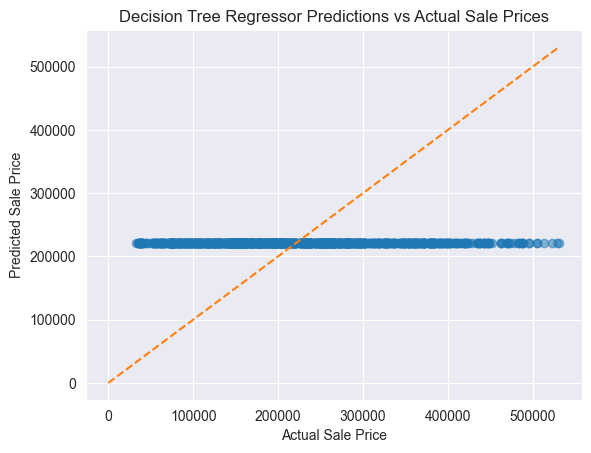

In [61]:
# Scatter plot for predicted vs actual sale prices
plt.scatter(y_test, dummy_y_pred, alpha=0.5, c="tab:blue")

# Labels and title
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Decision Tree Regressor Predictions vs Actual Sale Prices")

# Diagonal line for reference, close to the line = accurate
plt.plot([0, max(y_test)], [0, max(y_test)], "--", color="tab:orange")

# Show the plot
plt.show()

# 2.0 Decision Tree Regression

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Create the tree regressor object
tree_regressor = DecisionTreeRegressor(max_depth=5)

# Train the tree regressor on the training data
tree_regressor.fit(x_train, y_train)

# Make predictions on the test data
tree_y_pred = tree_regressor.predict(x_test)

# Evaluate the model using mean squared error and root mean squared error
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = np.sqrt(dummy_mse)

print("Root Mean Squared Error: {:.2f}".format(tree_rmse))
print("Mean squared error: ", tree_mse)


Root Mean Squared Error: 106339.98
Mean squared error:  1099336962.7118535


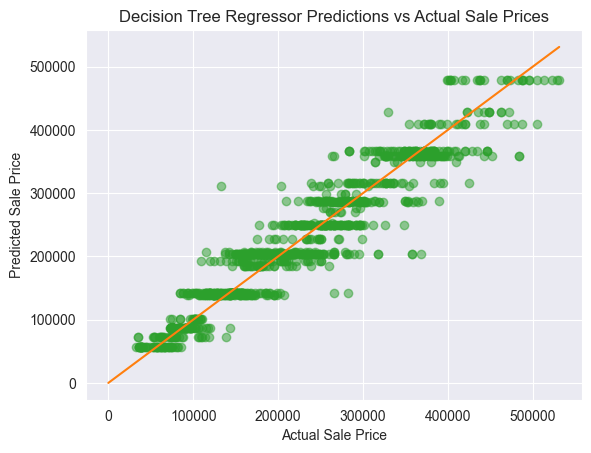

In [64]:
# Array of test indices
test_indices = range(len(y_test))

# Scatter plot for predicted vs actual sale prices
plt.scatter(y_test, tree_y_pred, alpha=0.5, c="tab:green")


# Labels and title
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Decision Tree Regressor Predictions vs Actual Sale Prices")

# Diagonal line for reference, close to the line = accurate
plt.plot([0, max(y_test)], [0, max(y_test)], "-", color="tab:orange")

# Show the plot
plt.show()

# 3.0 Long Short Term Memory